In [7]:
import os
import nltk
import csv
from matplotlib.pyplot import cm
import numpy as np
from nltk.corpus import stopwords
import math

import matplotlib.pyplot as plt


from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

from bs4 import BeautifulSoup
from community import community_louvain
from fa2 import ForceAtlas2

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment Analysis
>We want to be able to analyse the sentiment of a character throughout the books. Our idea for achieving this is to use concordance from nltk with the character name, this way we will get all of the context surrounding a character. For each of these occurrences we can compute the sentiment for the context, and use that sentiment as a representative for the character. This could be done on occurence basis, but since we are expecting to have many occurences how harry, and fewer for other main characters, and even less for the remaining characters, this would require additional steps to normalize the results.

In [ ]:
tokens = []
for chapter in os.listdir("B7/"):
    f = open("B7/" + chapter)
    raw = f.read()
    tokens += nltk.wordpunct_tokenize(raw)
text = nltk.Text(tokens)

text.dispersion_plot(["Harry", "Voldemort", "Snape", "Luna", "Neville", "Nagini"])

##  Sentiment for concordance of character, LabMT1.0

In [ ]:
characters = []

# Get characters and communities, according to fandom graph
with open("communities_from_fandom.csv", "r", encoding="utf8") as sent_file:
    csv = csv.reader(sent_file, delimiter=",")
    for row in csv:
        name = row[0]
        community = row[1]
        characters.append((name, community))

In [ ]:
import csv
# Create an empty list to store tuples of words and their 
# average happiness score
sent_list = []

# Read in the .tsv file
with open("LabMT1.0.tsv", "r", encoding="utf8") as sent_file:
    tsv_reader = csv.DictReader(sent_file, delimiter="\t")
    # For each sentiment in the file, save the word and average happiness in a tuple
    # and add it to the list
    for sent in tsv_reader:
        word = sent["word"]
        average = sent["happiness_average"]
        sent_list.append((word, average))

In [ ]:
# Defining function to calculate sentiment for a list of tokens
# Function for calculating the sentiment of a file from the frequency distribution for that file
def sentiment(tokens):
    # Total sentiment score of file
    sent_sum = 0.0
    # Total number of occurences of words
    occ_sum = 0
    
    # For each token and associated number of occurences
    for token, occ in tokens.items():
        # If the token is in the given list of words with rated happiness
        for word, score in sent_list:
            if token == word:
                sent_sum += (float(score) * occ)
                occ_sum += occ
    return sent_sum / occ_sum


In [ ]:
# Finding sentiment from a concordance list
def con_sentiment(con_list):
    sent_sum = 0
    line_num = 0
    for item in con_list:
        # Make left and right into one list
        left = [ch.lower() for ch in item.left if ch.isalpha()]
        right = [ch.lower() for ch in item.right if ch.isalpha()]
        combined = left + right
        #combined = [w for w in (left + right) if w not in stopwords]
        # Make freqDist, just in case
        fd = nltk.FreqDist(combined)
        sent_sum += sentiment(fd)
        line_num += 1
    if line_num == 0:
        return None # Character had no appearences in chapter
    return sent_sum / line_num

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:


# Assuming we have a list of the character names as we expect they appear
# Assuming we have the chapters each book as .txt files
char_list = ["Harry", "Snape", "Voldemort"] # List of character names as they appear

# Assuming folder structure books/book_n/chapter_n.txt
chapters = os.listdir("B7")

# Making a data table (char_list)x(num_chapters) to hold sentiments for each char in each chap
# tuple list with tuples (character, [sent chapter1, sent chapter2, ...])
sentiment_by_character = []

for character in char_list:
    sentiments = []
    for chapter in chapters:
        f = open("B7/" + chapter)
        raw = f.read()
        tokens = nltk.wordpunct_tokenize(raw)
        text = nltk.Text(tokens)
        con = text.concordance_list(character)
        sentiments.append(con_sentiment(con))
    sentiment_by_character.append((character, sentiments))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
color = iter(cm.rainbow(np.linspace(0, 1, len(char_list))))

for name, sentiments in sentiment_by_character:
    c = next(color)
    plt.plot(sentiments, c=c, label=name)

plt.legend()
plt.xlabel('Chapter')
plt.ylabel('Average sentiment')
plt.title('Average sentiment by chapter for selected characters')
plt.figtext(.5, -0.1, f"Plot of the average sentiment for Harry, Snape, and Voldemort in Death Hallows when calculating sentiment from LabMT1.0.", ha="center")

plt_labmt = plt

## Sentiment for concordance of character, vaderSentiment

In [1]:
# Finding sentiment from a concordance list
def con_sentiment(con_list):
    sent_sum = 0
    line_num = 0
    #for item in con_list:
    # Make left and right into one list
        #left = [ch.lower() for ch in item.left if ch.isalpha()]
        #right = [ch.lower() for ch in item.right if ch.isalpha()]
    combined = con_list.left + con_list.right
    combined = " ".join(combined)
        #combined = [w for w in (left + right) if w not in stopwords]
        # Make freqDist, just in case
        #fd = nltk.FreqDist(combined)
    vs = analyzer.polarity_scores(combined)
        #print(vs["compound"])
        #print(combined)

        #sent_sum += vs["compound"]
        #line_num += 1
    if vs == 0:
        return None # Character had no appearences in chapter
    return vs["compound"]

In [ ]:
## For single chapter



# Assuming we have a list of the character names as we expect they appear
# Assuming we have the chapters each book as .txt files
char_list = ["Harry", "Snape", "Voldemort"] # List of character names as they appear

# Assuming folder structure books/book_n/chapter_n.txt
chapters = os.listdir("B7")

# Making a data table (char_list)x(num_chapters) to hold sentiments for each char in each chap
# tuple list with tuples (character, [sent chapter1, sent chapter2, ...])
sentiment_by_character = []

for character in char_list:
    sentiments = []
    for chapter in chapters:
        f = open("B7/" + chapter)
        raw = f.read()
        tokens = nltk.wordpunct_tokenize(raw)
        text = nltk.Text(tokens)
        cons = text.concordance_list(character)
        sent_sum = 0
        lines = 0
        for con in cons:
            sent_sum += con_sentiment(con)
            lines += 1
        if lines == 0:
            sentiments.append(None)
        else: 
            sentiments.append(sent_sum / lines)
    sentiment_by_character.append((character, sentiments))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
color = iter(cm.rainbow(np.linspace(0, 1, len(char_list))))

# If a character does not appear in a chapter, the sentiment becomes 0. 
# To mitigate this, we set these chapters to have the sentiment of the previous
# otherwise these 0 drowns a lot of the difference
#for character, sentiment in sentiment_by_character:
#    for i in range(len(chapters)):
#        if sentiment == 0:
            
# Missing value i stedet for at sætte til 0 eller sidste værdi

for name, sentiments in sentiment_by_character:
    c = next(color)
    plt.plot(sentiments, c=c, label=name)
plt.axhline(y = 0.05, color ="purple", linestyle = '--')
plt.axhline(y = -0.05, color ="purple", linestyle = '--')


plt.legend()

plt.xlabel('Chapter')
plt.ylabel('Average sentiment')
plt.title('Average sentiment by chapter for selected characters')
plt.figtext(.5, -0.1, f"Plot of the average sentiment for Harry, Snape, and Voldemort in Death Hallows when using vaderSentiment.", ha="center")

plt_vader = plt

## LabMT1.0 vs vaderSentiment

## Functions

In [2]:
# Find sentiments for characters in a book 

# Input is a list of character names to look for as tokens
# and a path to the chapters of the book
def sent_chars_book(char_list, path_to_book):
    chapters = os.listdir(path_to_book)

    # Making a data table (char_list)x(num_chapters) to hold sentiments for each char in each chap
    # tuple list with tuples (character, [sent chapter1, sent chapter2, ...])
    sentiment_by_character = []

    for character in char_list:
        sentiments = []
        for chapter in chapters:
            f = open(path_to_book + chapter)
            raw = f.read()
            tokens = nltk.wordpunct_tokenize(raw)
            text = nltk.Text(tokens)
            cons = text.concordance_list(character)
            sent_sum = 0
            lines = 0
            for con in cons:
                sent_sum += con_sentiment(con)
                lines += 1
            if lines == 0:
                sentiments.append(None)
            else: 
                sentiments.append(sent_sum / lines)
        sentiment_by_character.append((character, sentiments))
    # Returns a list of the sentiments for that character for each chapter of that book
    return sentiment_by_character

In [38]:
# Find all sentiments for characters from aliases in a book
def sent_aliases_book(dict_aliases, path_to_book):
    # Making the dict into a list of tuples (character, aliases)
    character_aliases = list(dict_aliases.items())
    chapters = os.listdir(path_to_book)

    # Making a data table (char_list)x(num_chapters) to hold sentiments for each char in each chap
    # tuple list with tuples (character, [sent chapter1, sent chapter2, ...])
    sentiment_by_character = []

    for character, aliases in character_aliases: # For each list in the given list of lists
        sentiments = []
        for chapter in chapters: # For each chapter in the book
            lines = 0
            sent_sum = 0
            
            # read in the chapter
            f = open(path_to_book + chapter)
            raw = f.read()
            tokens = nltk.wordpunct_tokenize(raw)
            text = nltk.Text(tokens)
                
            for alias in aliases: # For each alias for that character

                # Make a concordance list for that alias in that chapter
                cons = text.concordance_list(alias)
                
                # Sum up the total sentiment for that alias and the number of lines it occurs in
                for con in cons:
                    sent_sum += con_sentiment(con)
                    lines += 1
            if lines == 0: # if none 
                sentiments.append(None)
            else: 
                sentiments.append(sent_sum / lines)
        sentiment_by_character.append((character, sentiments))
    # Returns a list of tuples on the form (character name, list of sentiments)
    return sentiment_by_character

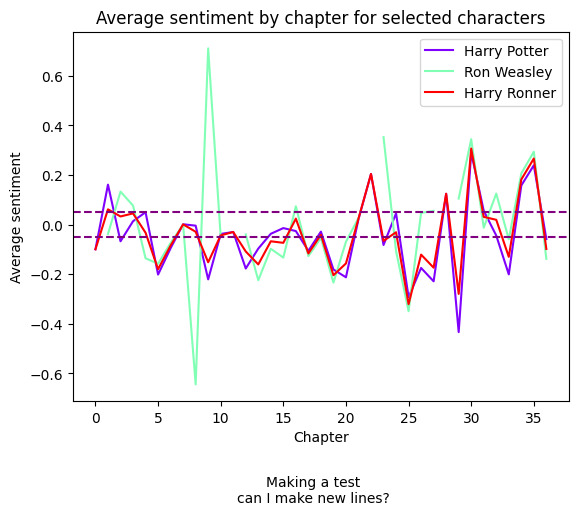

In [43]:
d = dict({"Harry Potter": ["Harry"], "Ron Weasley": ["Ron"], "Harry Ronner": ["Harry", "Ron"]})
sentiments = sent_aliases_book(d, "B7/")
plot_sentiments(sentiments, f"Making a test\ncan I make new lines?")


In [30]:
# Function to plot the sentiments for a list of characters
# input is a list of lists, each list contains the sentiments by chapter/book
# for each character. Designed to take input from either
# sent_chars_book or sent_aliases_book
def plot_sentiments(sentiment_by_character, figure_text):
    # Init iterator
    color = iter(cm.rainbow(np.linspace(0, 1, len(sentiment_by_character))))

    for name, sentiments in sentiment_by_character:
        c = next(color)
        plt.plot(sentiments, c=c, label=name)
    plt.axhline(y = 0.05, color ="purple", linestyle = '--')
    plt.axhline(y = -0.05, color ="purple", linestyle = '--')


    plt.legend()

    plt.xlabel('Chapter')
    plt.ylabel('Average sentiment')
    plt.title('Average sentiment by chapter for selected characters')
    plt.figtext(.5, -0.1, figure_text, ha="center")

    plt.show()

NameError: name 'sentiment_by_character' is not defined